In [14]:
import numpy as np
import pandas as pd


In [19]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [20]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4786,ham,ÌÏ thk of wat to eat tonight.,NaN,NaN,NaN
244,ham,U don't remember that old commercial?,NaN,NaN,NaN
2460,ham,i cant talk to you now.i will call when i can....,NaN,NaN,NaN
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...,NaN,NaN,NaN
1965,ham,Thanks. It was only from tescos but quite nice...,NaN,NaN,NaN


In [21]:
df.shape


(5572, 5)

# Cleaning The Data from spam.csv Database


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [25]:
df.sample(5)

,v1,v2
752,ham,Dont gimme that lip caveboy
3169,ham,"Mah b, I'll pick it up tomorrow"
2478,ham,Not yet. Just i'd like to keep in touch and it...
3185,ham,Happy birthday to you....dear.with lots of lov...
5368,spam,IMPORTANT MESSAGE. This is a final contact att...


# change the v1 & v2 columns name

In [29]:
df.rename(columns={'v1':'csf','v2':'text'},inplace=True)
df.sample(5)


,csf,text
2365,ham,Ok try to do week end course in coimbatore.
5379,ham,Somebody set up a website where you can play h...
3679,ham,I cant pick the phone right now. Pls send a me...
2080,ham,Where is it. Is there any opening for mca.
1347,ham,She doesnt need any test.


# repalce ham by 0 & spam by 1

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
df['csf'] = encoder.fit_transform(df['csf'])

In [32]:
df.head()

,csf,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# check for the any null value in csf and text

In [33]:
df.isnull().sum()

csf     0
text    0
dtype: int64

# check for the duplicate values are present or not in the columns

In [35]:
df.duplicated().sum()

403

# Removing the duplicated values

In [36]:
df = df.drop_duplicates(keep='first')

In [37]:
df.duplicated().sum()

0

In [39]:
df.shape

(5169, 2)

In [40]:
df.head()

,csf,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory data analysis (EDA)

In [41]:
df.head()

,csf,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# check the how many spam (1) & ham(0) message in the database

In [42]:
df['csf'].value_counts()

0    4516
1     653
Name: csf, dtype: int64

In [44]:
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/omkar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# add new column for char

In [47]:
df['char'] = df['text'].apply(len)

/tmp/ipykernel_43723/1561842221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char'] = df['text'].apply(len)


In [48]:
df.head()

,csf,text,char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# add new column for words

In [49]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipykernel_43723/4140123077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [50]:
df.head()

,csf,text,char,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


# add new column for sentences

In [51]:
df['sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

/tmp/ipykernel_43723/3580948724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [52]:
df.head()

,csf,text,char,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='char', ylabel='Count'>

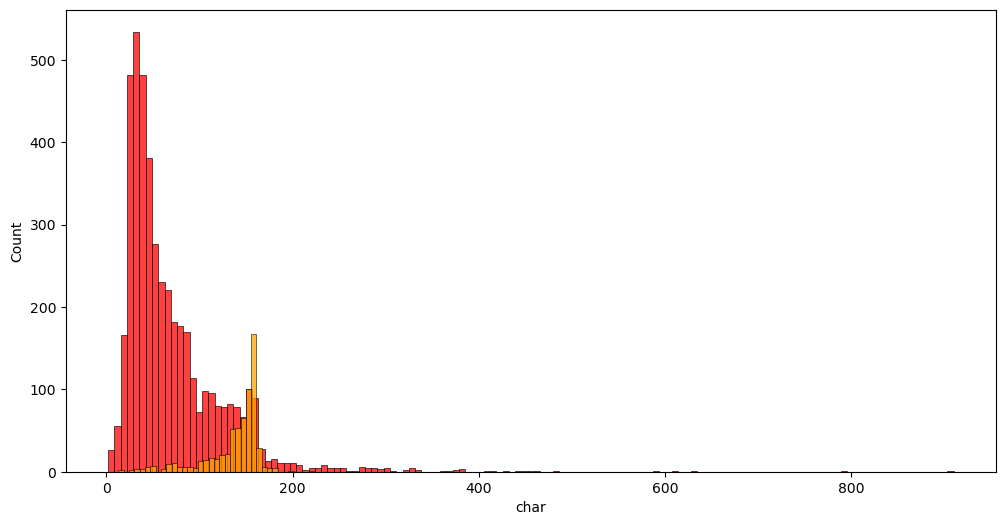

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['csf'] == 0]['char'],color='red')
sns.histplot(df[df['csf'] == 1]['char'],color='orange')

/tmp/ipykernel_43723/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

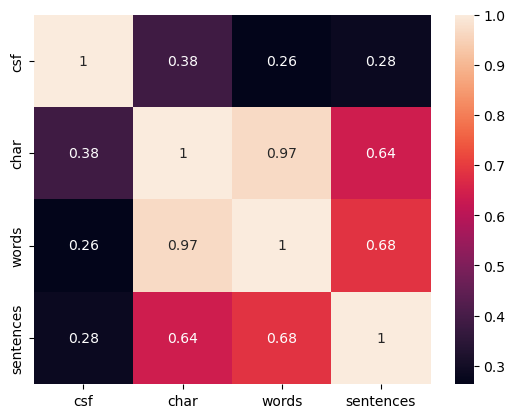

In [61]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing process 
1 convert capital letter in to lower case
2 tokenization
3 romved the special char
4 remov stop word and punctuation
5 last is stemming

In [64]:
def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)    

In [75]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/omkar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [76]:
df['trans_text'] = df['text'].apply(trans_text)

/tmp/ipykernel_43723/1954216559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_text'] = df['text'].apply(trans_text)


In [77]:
df.head()

,csf,text,char,words,sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 5.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=99138 sha256=4bdefcc2741b54499156d5da68fb62796df61ad15c1e229d822de399f1f49f5e
  Stored in directory: /Users/omkar/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [85]:
spam_corpus = []
for msg in df[df['csf'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [86]:
len(spam_corpus)

9939

In [90]:
ham_corpus = []
for msg in df[df['csf'] == 0]['trans_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [91]:
len(ham_corpus)

35394

In [92]:
df.head()

,csf,text,char,words,sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Building a Model

In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [139]:
X = tfidf.fit_transform(df['trans_text']).toarray()

In [140]:
X.shape

(5169, 3000)

In [141]:
y = df['csf'].values

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [144]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [145]:
Gnb = GaussianNB()
Mnb = MultinomialNB()
Bnb = BernoulliNB()

In [149]:
Gnb.fit(x_train,y_train)
y_predict1 = Gnb.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [150]:
Mnb.fit(x_train,y_train)
y_predict2 = Mnb.predict(x_test)
print(accuracy_score(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [151]:
Bnb.fit(x_train,y_train)
y_predict3 = Bnb.predict(x_test)
print(accuracy_score(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# multinomialNB shows best result so we try the Mnb

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [153]:
pip install xgboost



SyntaxError: invalid syntax (1537390770.py, line 1)

In [154]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [156]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [157]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [158]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [159]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [160]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [162]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [163]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [164]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [165]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


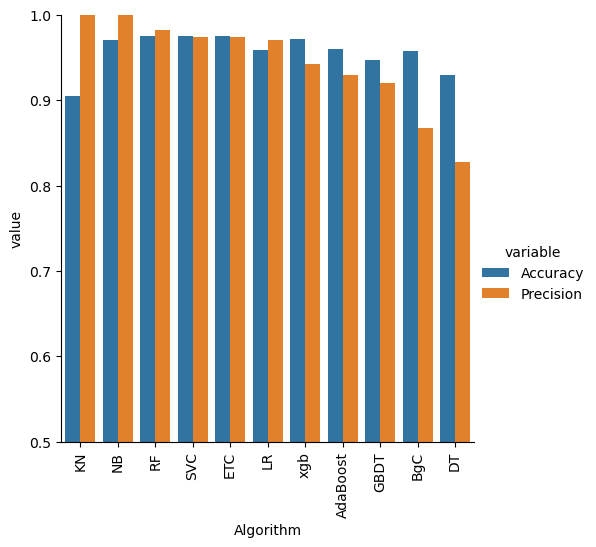

In [166]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [167]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))